# Enhanced Lab: Linear Regression Analysis

## 1. Clarifying Concepts

### 1.1 The R-squared and Adjusted R-squared

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from scipy import stats

# Generate synthetic data
np.random.seed(42)
X = np.random.normal(0, 1, (100, 3))
y = 2*X[:, 0] + 0.5*X[:, 1] - X[:, 2] + np.random.normal(0, 0.1, 100)

In [12]:
# Calculate R-squared and Adjusted R-squared
def calculate_r_squared_metrics(X, y):
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return r2, adjusted_r2

r2, adj_r2 = calculate_r_squared_metrics(X, y)
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

R-squared: 0.9984
Adjusted R-squared: 0.9983


### 1.2 Feature Selection and Multicollinearity

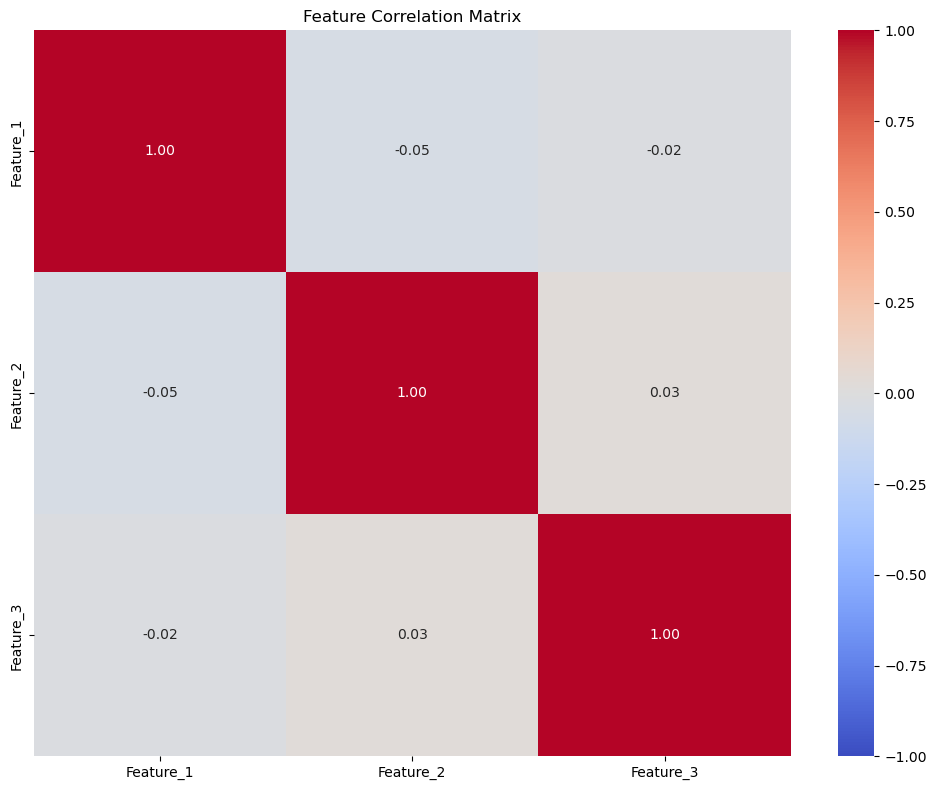

In [13]:
def analyze_multicollinearity(X, feature_names=None):
    if feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    
    # Convert to DataFrame first to ensure proper correlation calculation
    df = pd.DataFrame(X, columns=feature_names)
    correlation_matrix = df.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, 
                annot=True,
                fmt='.2f',
                cmap='coolwarm', 
                center=0,
                vmin=-1,
                vmax=1) 
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

X = np.random.randn(100, 3)
feature_names = ['Feature_1', 'Feature_2', 'Feature_3']
correlation_matrix = analyze_multicollinearity(X, feature_names)

## 2. Advanced Concepts
### 2.1 Residual Analysis

X shape: (1000, 3)
y shape: (1000,)


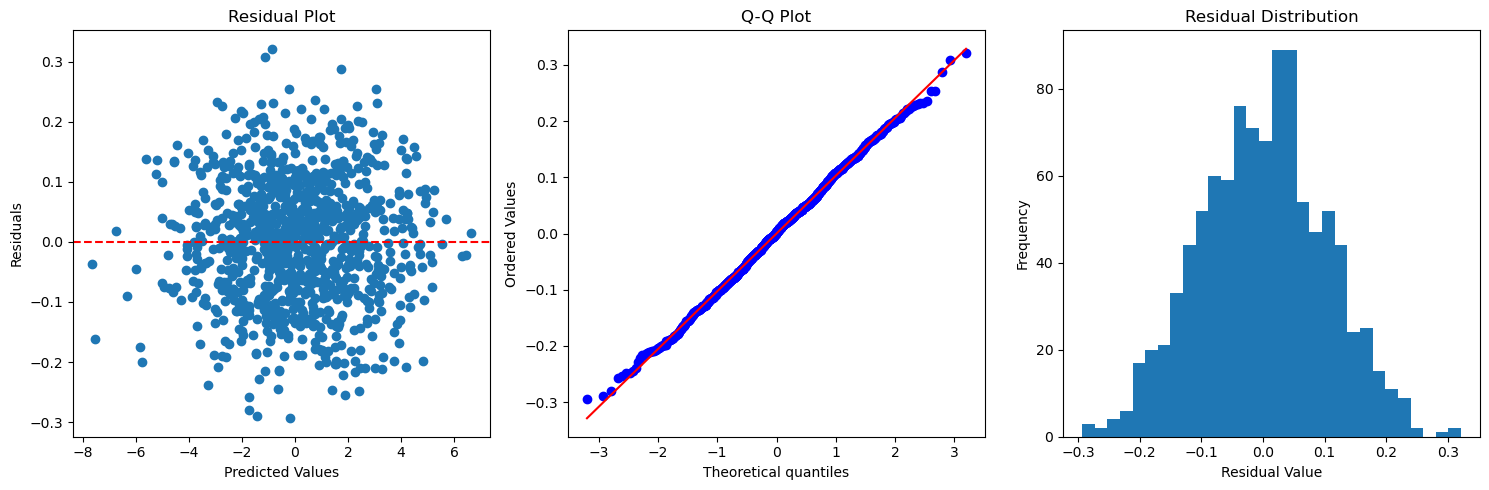

R-squared: 0.9979


In [14]:

np.random.seed(42)

n_samples = 1000 
n_features = 3 

X = np.random.normal(0, 1, (n_samples, n_features))


y = (2 * X[:, 0] +
     0.5 * X[:, 1] +
     -1 * X[:, 2] +
     np.random.normal(0, 0.1, n_samples))


print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

def plot_residual_analysis(model, X, y):
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    
    plt.subplot(132)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(133)
    plt.hist(residuals, bins=30)
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution')
    
    plt.tight_layout()
    plt.show()

model = LinearRegression().fit(X, y)
plot_residual_analysis(model, X, y)

print(f"R-squared: {model.score(X, y):.4f}")

### 2.2 Regularization Techniques

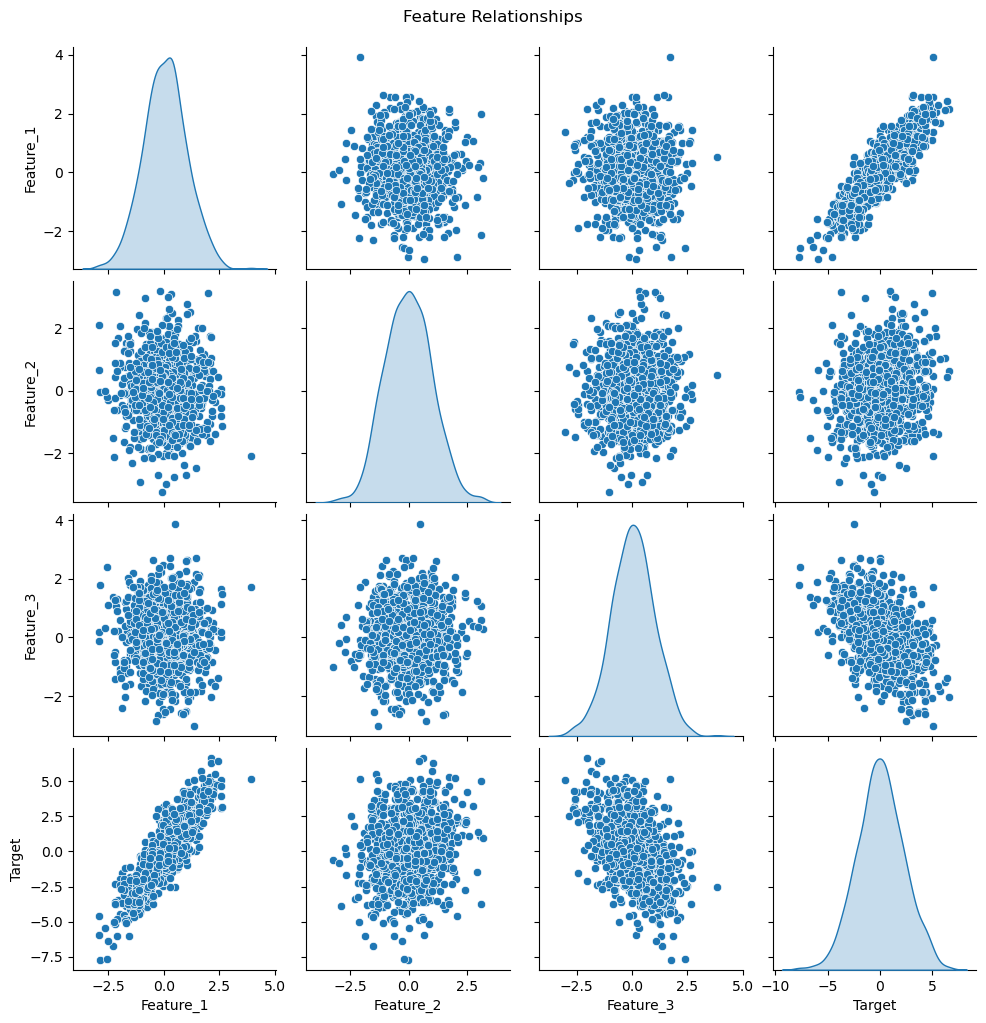


Regularization Results:

Linear:
  Train R²: 0.9978
  Test R²: 0.9982

Ridge:
  Train R²: 0.9978
  Test R²: 0.9982

Lasso:
  Train R²: 0.5268
  Test R²: 0.5227


In [15]:

np.random.seed(42)
n_samples = 1000
n_features = 3

X = np.random.normal(0, 1, (n_samples, n_features))
y = (2 * X[:, 0] + 0.5 * X[:, 1] - X[:, 2] + np.random.normal(0, 0.1, n_samples))

feature_names = [f'Feature_{i+1}' for i in range(n_features)]

def plot_feature_relationships(X, y, feature_names):
    data = pd.DataFrame(X, columns=feature_names)
    data['Target'] = y

    sns.pairplot(data, diag_kind='kde')
    plt.suptitle('Feature Relationships', y=1.02)
    plt.show()


def compare_regularization(X, y):
    models = {
        'Linear': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0)
    }

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        results[name] = {'train_score': train_score, 'test_score': test_score}
    
    return results

plot_feature_relationships(X, y, feature_names)
regularization_results = compare_regularization(X, y)

print("\nRegularization Results:")
for model, scores in regularization_results.items():
    print(f"\n{model}:")
    print(f"  Train R²: {scores['train_score']:.4f}")
    print(f"  Test R²: {scores['test_score']:.4f}")

## 3. Visualizations

### 3.1 Feature Relationships

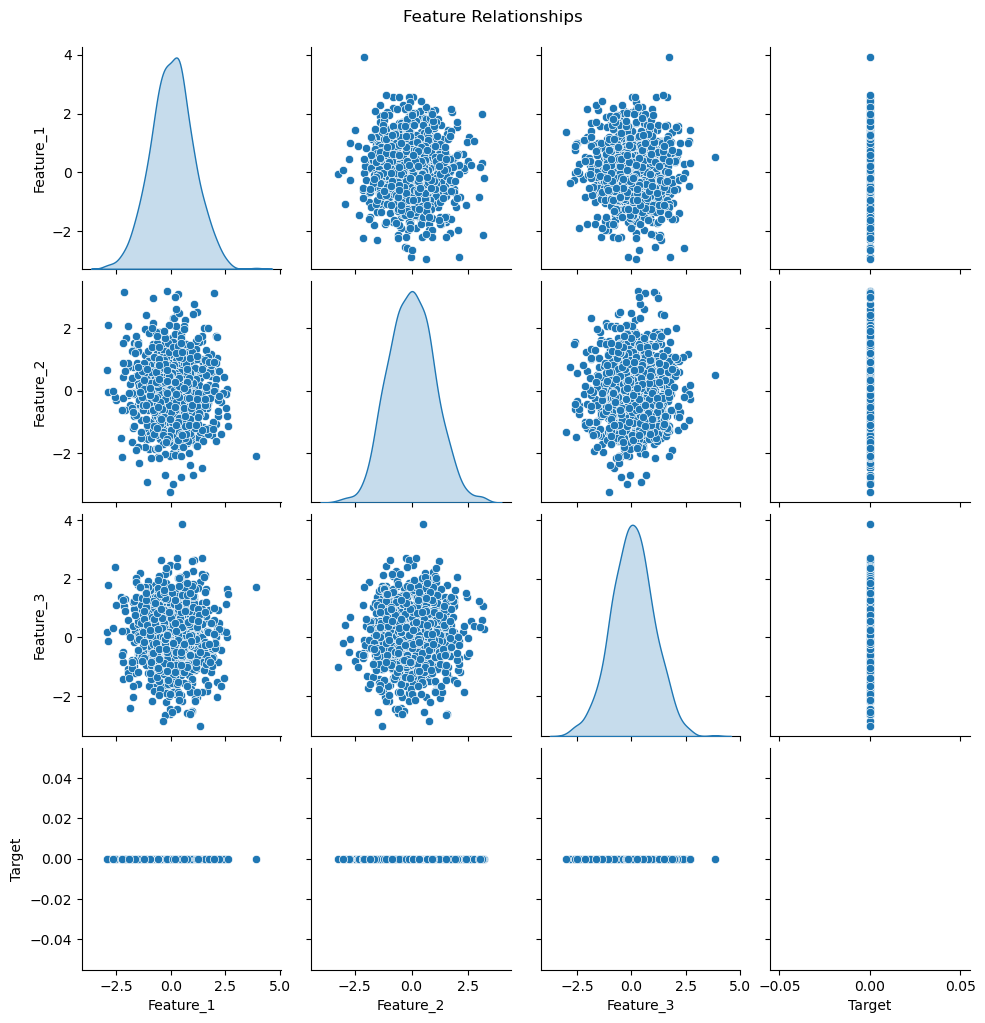

In [16]:
def plot_feature_relationships(X, feature_names=None, y=None):
    if feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    if y is None:
        y = np.zeros(len(X))  # or handle the case when y is not provided
    
    data = pd.DataFrame(X, columns=feature_names)
    data['Target'] = y
    
    # Pairplot
    sns.pairplot(data, diag_kind='kde')
    plt.suptitle('Feature Relationships', y=1.02)
    plt.show()

# Now this call will work
plot_feature_relationships(X, feature_names)

### 3.2 Model Coefficients

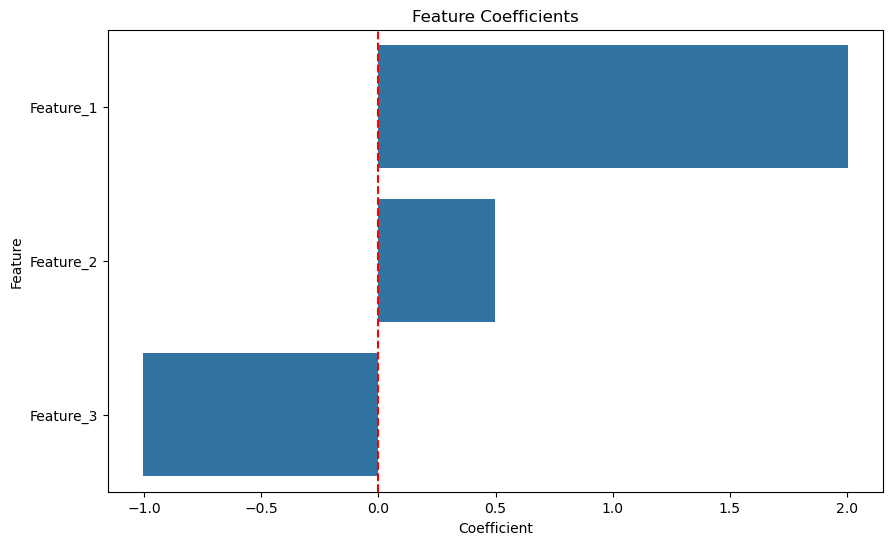

In [17]:
def visualize_coefficients(model, feature_names=None):
    if feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(len(model.coef_))]
    
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_
    })
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title('Feature Coefficients')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.show()

# First fit the model
model = LinearRegression()
model.fit(X, y)

# Then visualize coefficients
visualize_coefficients(model, feature_names)

### 3.3 Prediction Confidence

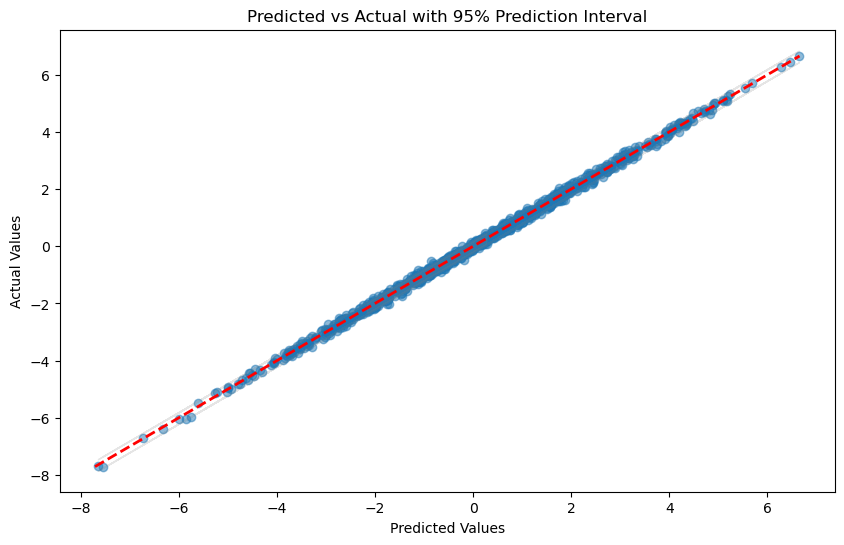

In [18]:
from scipy import stats

def plot_prediction_intervals(X, y, model):
    y_pred = model.predict(X)
    
    # Calculate prediction intervals
    mse = np.mean((y - y_pred) ** 2)
    std_error = np.sqrt(mse)
    
    z = stats.norm.ppf(0.975)  # 95% confidence interval
    pi = z * std_error
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.fill_between(y_pred, y_pred - pi, y_pred + pi, color='gray', alpha=0.2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs Actual with 95% Prediction Interval')
    plt.show()

plot_prediction_intervals(X, y, model)

### 3.4 Real-World Applications
#### 3.4.1 California Housing Dataset


California Housing Dataset Results:
Train R²: 0.6126
Test R²: 0.5758


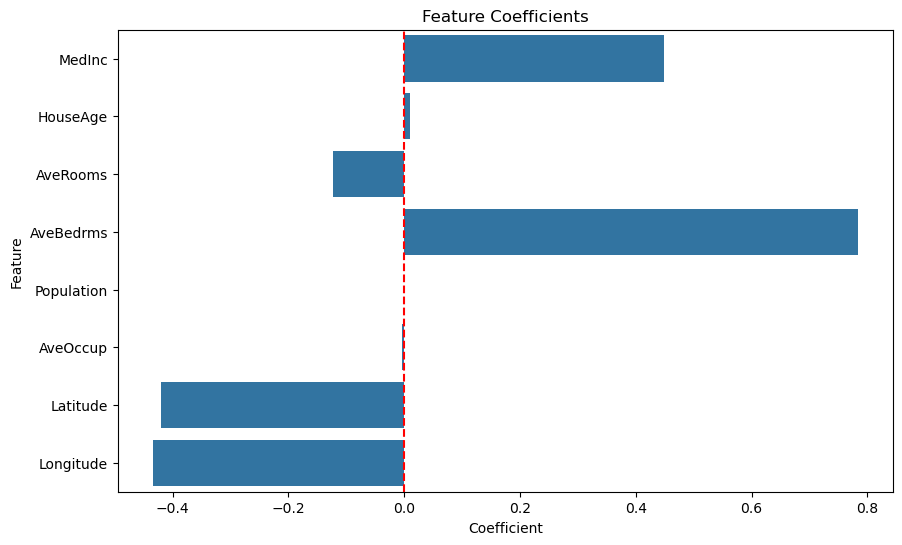

In [19]:
# Replace Boston dataset with California housing dataset
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
california = fetch_california_housing()
X_cal = california.data
y_cal = california.target

# Create and evaluate model
model_cal = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_cal, y_cal, test_size=0.2, random_state=42)
model_cal.fit(X_train, y_train)

print("\nCalifornia Housing Dataset Results:")
print(f"Train R²: {model_cal.score(X_train, y_train):.4f}")
print(f"Test R²: {model_cal.score(X_test, y_test):.4f}")

# Visualize feature importance
visualize_coefficients(model_cal, california.feature_names)